# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [56]:
# place your code into this Code cell
df= pd.read_csv("data/Obesity_among_children_and_adolescents_aged_2_19_years__by_selected_characteristics__United_States.csv")

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

### Show 5 rows, selected at random, from the data set

In [57]:

df.sample(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL_NUM,STUB_LABEL,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
485,Obesity among children and adolescents aged 2-...,6-11 years,3,"Percent of population, crude",1,Race and Hispanic origin,3,3.210,Hispanic or Latino: All races,2007-2010,6,6-11 years,0.2,23.8,1.2,NaN
1,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0.000,2-19 years,1999-2002,2,2-19 years,0.0,14.8,0.7,NaN
691,Obesity among children and adolescents aged 2-...,12-19 years,4,"Percent of population, crude",1,Race and Hispanic origin,3,3.210,Hispanic or Latino: All races,1999-2002,2,12-19 years,0.3,NaN,NaN,-
380,Obesity among children and adolescents aged 2-...,2-5 years,2,"Percent of population, crude",1,Percent of poverty level,5,5.100,Below 100%,1988-1994,1,2-5 years,0.1,9.7,1.7,NaN
531,Obesity among children and adolescents aged 2-...,6-11 years,3,"Percent of population, crude",1,Sex and race and Hispanic origin,4,4.121,Male: Hispanic or Latino: All races,1999-2002,2,6-11 years,0.2,NaN,NaN,-


### Show each of the column names and their data types 

In [58]:
df.dtypes

INDICATOR          object
PANEL              object
PANEL_NUM           int64
UNIT               object
UNIT_NUM            int64
STUB_NAME          object
STUB_NAME_NUM       int64
STUB_LABEL_NUM    float64
STUB_LABEL         object
YEAR               object
YEAR_NUM            int64
AGE                object
AGE_NUM           float64
ESTIMATE          float64
SE                float64
FLAG               object
dtype: object

### Show any unique features of your chosen data set

In [59]:
df.nunique()

INDICATOR           1
PANEL               4
PANEL_NUM           4
UNIT                1
UNIT_NUM            1
STUB_NAME           6
STUB_NAME_NUM       6
STUB_LABEL_NUM     23
STUB_LABEL         24
YEAR               10
YEAR_NUM           10
AGE                 4
AGE_NUM             4
ESTIMATE          211
SE                 36
FLAG                2
dtype: int64

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

### Firstly, I check whether there is any duplicated data in the dataset.

In [60]:
df[df.duplicated(keep='first')] 

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL_NUM,STUB_LABEL,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG


### Secondly, I remove redundant and unnecessary columns in the dataset.

In [61]:
data_cleaned = df.drop(columns=['INDICATOR','PANEL', 'UNIT', 'UNIT_NUM', 'STUB_NAME_NUM', 
                                  'STUB_LABEL_NUM', 'AGE', 'AGE_NUM', 'FLAG'])


### Thirdly, I check for missing values in the dataset. 

In [62]:
missing_values = data_cleaned.isnull().sum()
print(missing_values)

PANEL_NUM       0
STUB_NAME       0
STUB_LABEL      0
YEAR            0
YEAR_NUM        0
ESTIMATE      167
SE            167
dtype: int64


### Then, I remove the rows with missing values.

In [63]:
data_cleaned = data_cleaned.dropna()

### And I check again whether there is any missing value in the dataset now. 

In [64]:
missing_values = data_cleaned.isnull().sum()
print(missing_values)

PANEL_NUM     0
STUB_NAME     0
STUB_LABEL    0
YEAR          0
YEAR_NUM      0
ESTIMATE      0
SE            0
dtype: int64


### Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

In [65]:
data_cleaned.sample(5)

,PANEL_NUM,STUB_NAME,STUB_LABEL,YEAR,YEAR_NUM,ESTIMATE,SE
717,4,Sex and race and Hispanic origin,Male: Not Hispanic or Latino: Black or African...,2011-2014,8,20.9,2.2
802,4,Percent of poverty level,Below 100%,2001-2004,3,18.2,1.5
578,3,Sex and race and Hispanic origin,Female: Hispanic or Latino: All races,2013-2016,9,24.5,2.0
504,3,Sex and race and Hispanic origin,Male: Not Hispanic or Latino: Black or African...,2005-2008,5,18.7,2.7
420,3,Sex,Male,1988-1994,1,11.6,1.3


### Then, I save the cleaned dataset as a new csv file.

In [66]:
cleaned_file_path = '/Users/zhangjianing/Desktop/Databases/8-pandas-exploration-Catherineya/data/data_cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

### 1. Started with a basic statistical description to understand the dataset's numeric columns, specifically ESTIMATE (obesity rate estimates) and SE (standard error). 
This provided an overview of the obesity rate estimates and the uncertainty level in the dataset.

In [67]:
basic_stats = data_cleaned[['ESTIMATE', 'SE']].describe()
print(basic_stats)

         ESTIMATE         SE
count  673.000000  673.00000
mean    16.778158    1.72630
std      5.311935    0.63034
min      4.400000    0.50000
25%     12.700000    1.30000
50%     16.700000    1.60000
75%     20.600000    2.10000
max     33.300000    4.50000


### 2. Then, I grouped the data by state and calculated the mean obesity rate for each state.
This code groups the data by the YEAR column and calculates the mean of the ESTIMATE column for each year range, helping us understand the trend of obesity rates over different time periods.

In [68]:
year_trend = data_cleaned.groupby('YEAR')['ESTIMATE'].mean().reset_index()
print(year_trend)

        YEAR   ESTIMATE
0  1988-1994  10.735088
1  1999-2002  15.171186
2  2001-2004  16.362712
3  2003-2006  16.711667
4  2005-2008  16.816949
5  2007-2010  17.802778
6  2009-2012  18.081690
7  2011-2014  17.051282
8  2013-2016  17.791139
9  2015-2018  19.282278


### 3. Then, I grouped the data by STUB_NAME and calculated the average obesity rate for each group.
The data is grouped by STUB_NAME, and the mean of the ESTIMATE column is calculated for each group. This analysis helps reveal variations in obesity rates across different demographic groups.

In [69]:
group_analysis = data_cleaned.groupby('STUB_NAME')['ESTIMATE'].mean().sort_values(ascending=False).reset_index()
print(group_analysis)

                          STUB_NAME   ESTIMATE
0          Race and Hispanic origin  17.750336
1  Sex and race and Hispanic origin  17.480478
2                             Total  16.100000
3          Percent of poverty level  15.721569
4                               Sex  15.442500
5                               Age  15.250000


### 4. I sorted the data by obesity rate (ESTIMATE) in descending order and observed the highest and lowest rates.
This analysis helps us identify the states with the highest and lowest obesity rates.

In [70]:
sorted_data = data_cleaned.sort_values('ESTIMATE', ascending=False)

top_5 = sorted_data.head(5)
bottom_5 = sorted_data.tail(5)

print(top_5, bottom_5)

     PANEL_NUM                         STUB_NAME  \
759          4  Sex and race and Hispanic origin   
749          4  Sex and race and Hispanic origin   
709          4          Race and Hispanic origin   
549          3  Sex and race and Hispanic origin   
130          1  Sex and race and Hispanic origin   

                                       STUB_LABEL       YEAR  YEAR_NUM  \
759  Male: Hispanic or Latino: Mexican: All races  2015-2018        10   
749           Male: Hispanic or Latino: All races  2015-2018        10   
709        Hispanic or Latino: Mexican: All races  2015-2018        10   
549  Male: Hispanic or Latino: Mexican: All races  2015-2018        10   
130  Male: Hispanic or Latino: Mexican: All races  2015-2018        10   

     ESTIMATE   SE  
759      33.3  3.3  
749      31.1  3.0  
709      30.6  2.8  
549      29.6  3.5  
130      29.2  1.9        PANEL_NUM                         STUB_NAME  \
240          2          Race and Hispanic origin   
416         

### 5. I analyzed the standard error (SE) to understand the degree of uncertainty in the estimates.
The analysis of standard error provided insights into the reliability of the estimates in the dataset.

In [71]:
se_mean = data_cleaned['SE'].mean()
se_range = data_cleaned['SE'].max() - data_cleaned['SE'].min()

# Finding the rows with the highest and lowest standard error
highest_se = [data_cleaned['SE'] == data_cleaned['SE'].max()]
lowest_se = data_cleaned[data_cleaned['SE'] == data_cleaned['SE'].min()]

print(se_mean)
print(se_range)
print(highest_se)
print(lowest_se)

1.7263001485884104
4.0
[0      False
1      False
2      False
3      False
4      False
       ...  
835    False
836    False
837    False
838    False
839    False
Name: SE, Length: 673, dtype: bool]
   PANEL_NUM STUB_NAME  STUB_LABEL       YEAR  YEAR_NUM  ESTIMATE   SE
0          1     Total  2-19 years  1988-1994         1      10.0  0.5


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### 1. Visualization 1: Year Trend Line Chart
The line chart above illustrates the trend in obesity rates over different year ranges. It clearly shows an upward trend in obesity rates from 1988-1994 through to 2015-2018, indicating an increasing prevalence of obesity among children and adolescents over time.

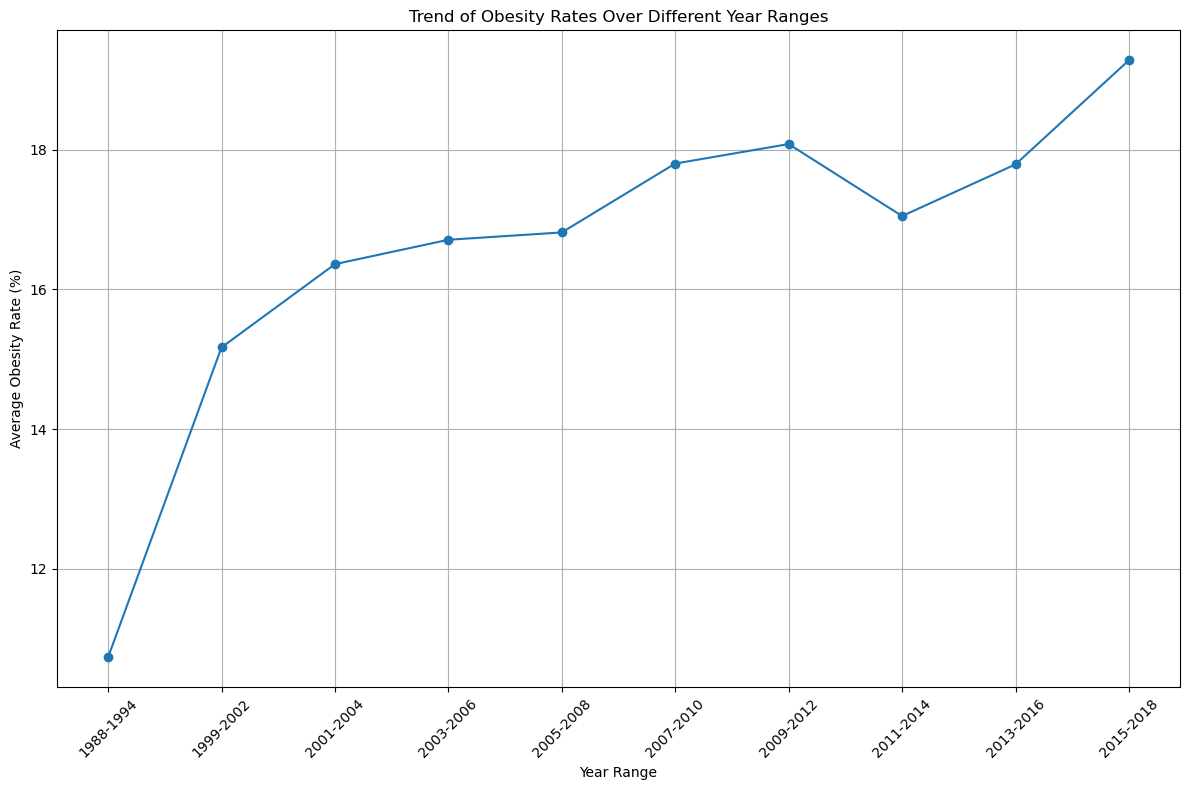

In [72]:
plt.figure(figsize=(12, 8))
plt.plot(year_trend['YEAR'], year_trend['ESTIMATE'], marker='o')
plt.xticks(rotation=45)
plt.title('Trend of Obesity Rates Over Different Year Ranges')
plt.xlabel('Year Range')
plt.ylabel('Average Obesity Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Group Analysis Bar Chart
I create a bar chart to compare the average obesity rates across different demographic groups (STUB_NAME). This will visually represent the differences in obesity rates among various categories such as race, sex, and socioeconomic status.

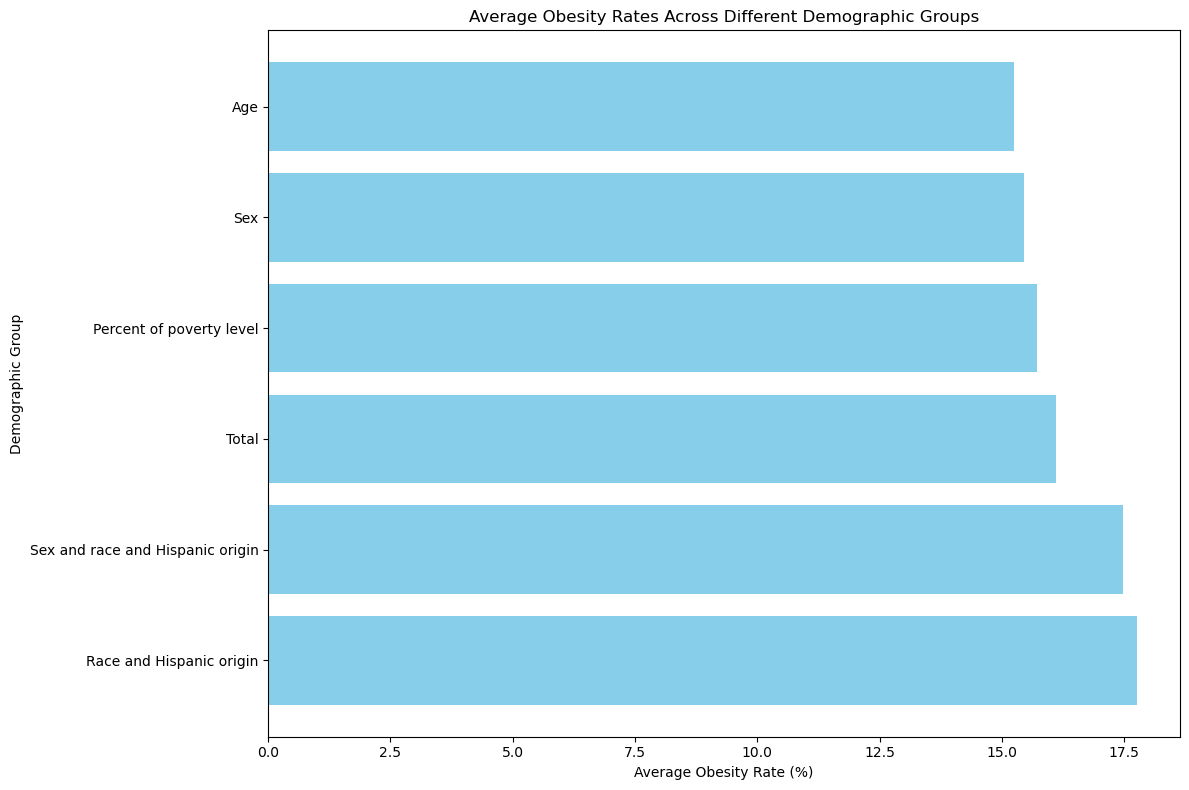

In [73]:
plt.figure(figsize=(12, 8))
plt.barh(group_analysis['STUB_NAME'], group_analysis['ESTIMATE'], color='skyblue')
plt.title('Average Obesity Rates Across Different Demographic Groups')
plt.xlabel('Average Obesity Rate (%)')
plt.ylabel('Demographic Group')
plt.tight_layout()
plt.show()

### Visualization 3: Top 5 vs Bottom 5 Obesity Rates
I use a horizontal bar chart to display the top 5 and bottom 5 obesity rates in the dataset. This visualization will highlight the highest and lowest obesity rates and the categories they belong to.

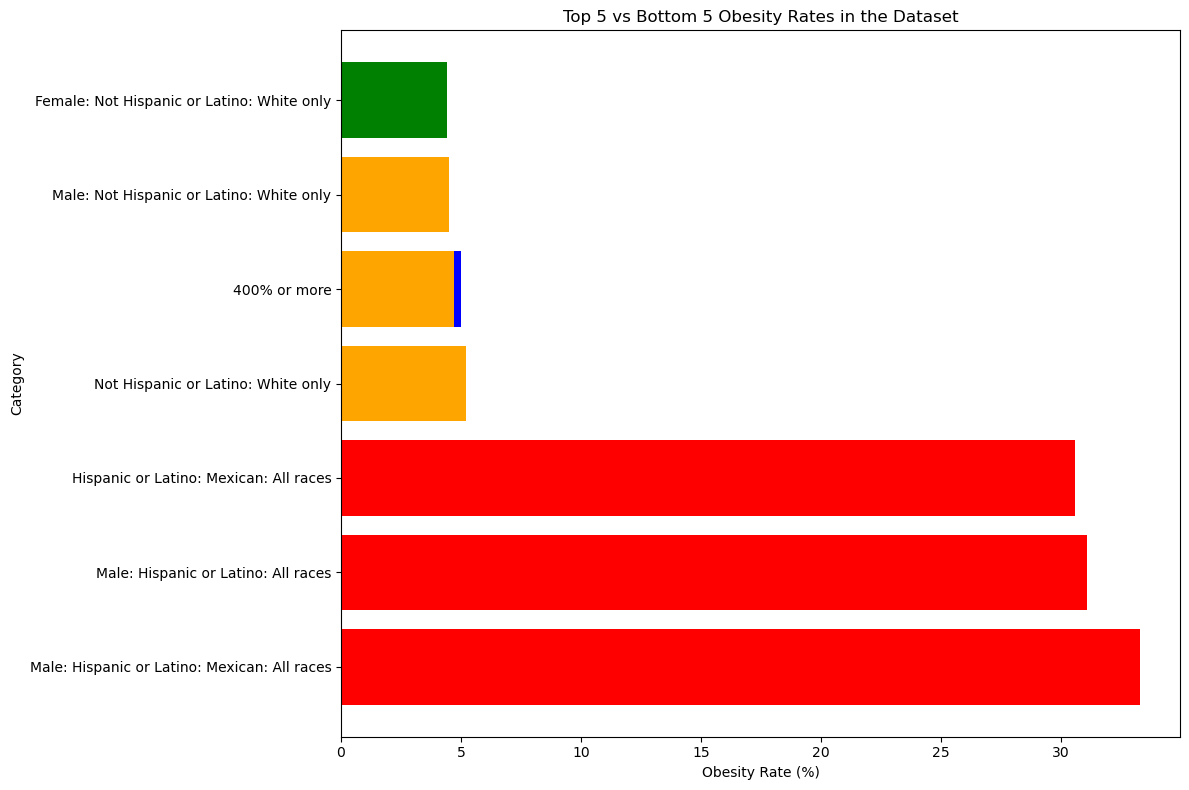

In [74]:

sorted_data = data_cleaned.sort_values('ESTIMATE', ascending=False)
top_5 = sorted_data.head(5)
bottom_5 = sorted_data.tail(5)
extremes = pd.concat([top_5, bottom_5])

# Top 5 vs Bottom 5 Obesity Rates using Matplotlib
plt.figure(figsize=(12, 8))
plt.barh(extremes['STUB_LABEL'], extremes['ESTIMATE'], color=extremes['YEAR'].map({'2015-2018': 'red', '2011-2014': 'green', '2009-2012': 'blue', '2007-2010': 'cyan', '2005-2008': 'magenta', '2003-2006': 'yellow', '2001-2004': 'black', '1999-2002': 'grey', '1988-1994': 'orange'}))
plt.title('Top 5 vs Bottom 5 Obesity Rates in the Dataset')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()



### Visualization 4: Distribution of Obesity Rates
 A histogram will be used to show the distribution of obesity rates (ESTIMATE) across the dataset.

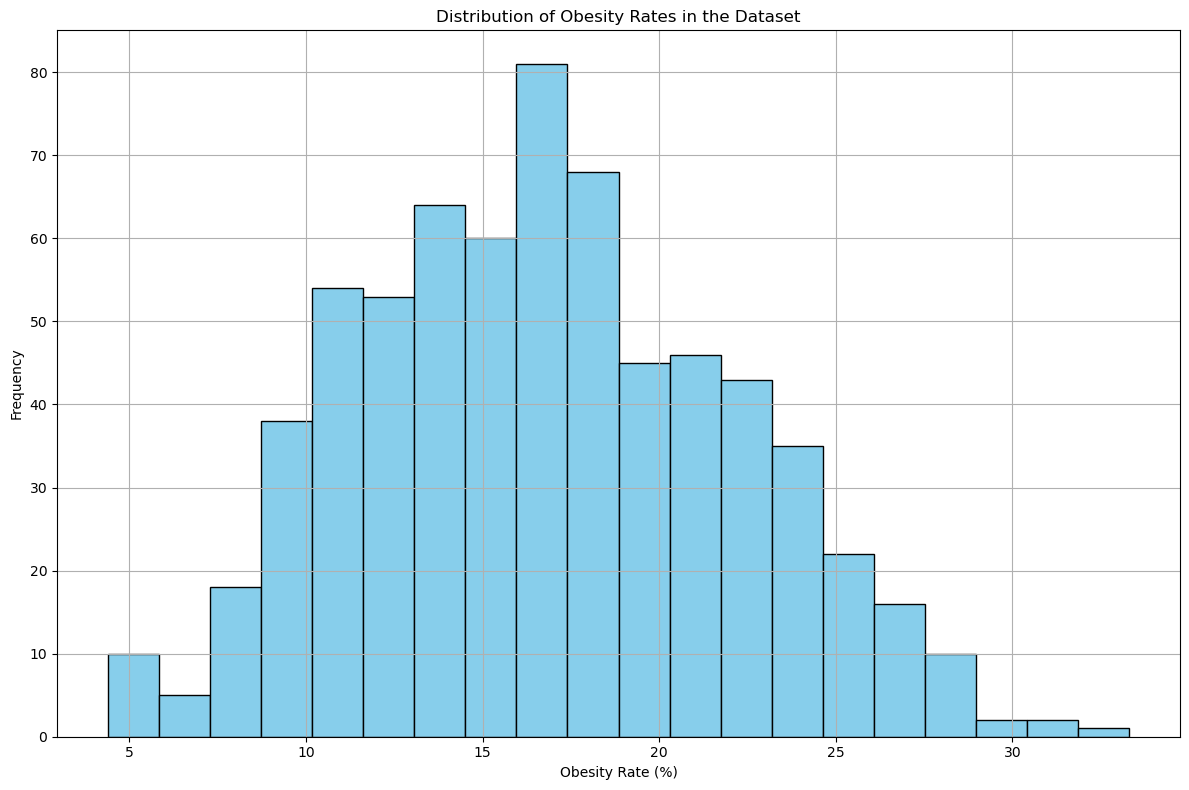

In [75]:

plt.figure(figsize=(12, 8))
plt.hist(data_cleaned['ESTIMATE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Obesity Rates in the Dataset')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualization 5: Standard Error Boxplot
I create a boxplot to visualize the distribution of standard errors (SE) in the dataset. This will provide insights into the variability, spread, and potential outliers of the standard errors.

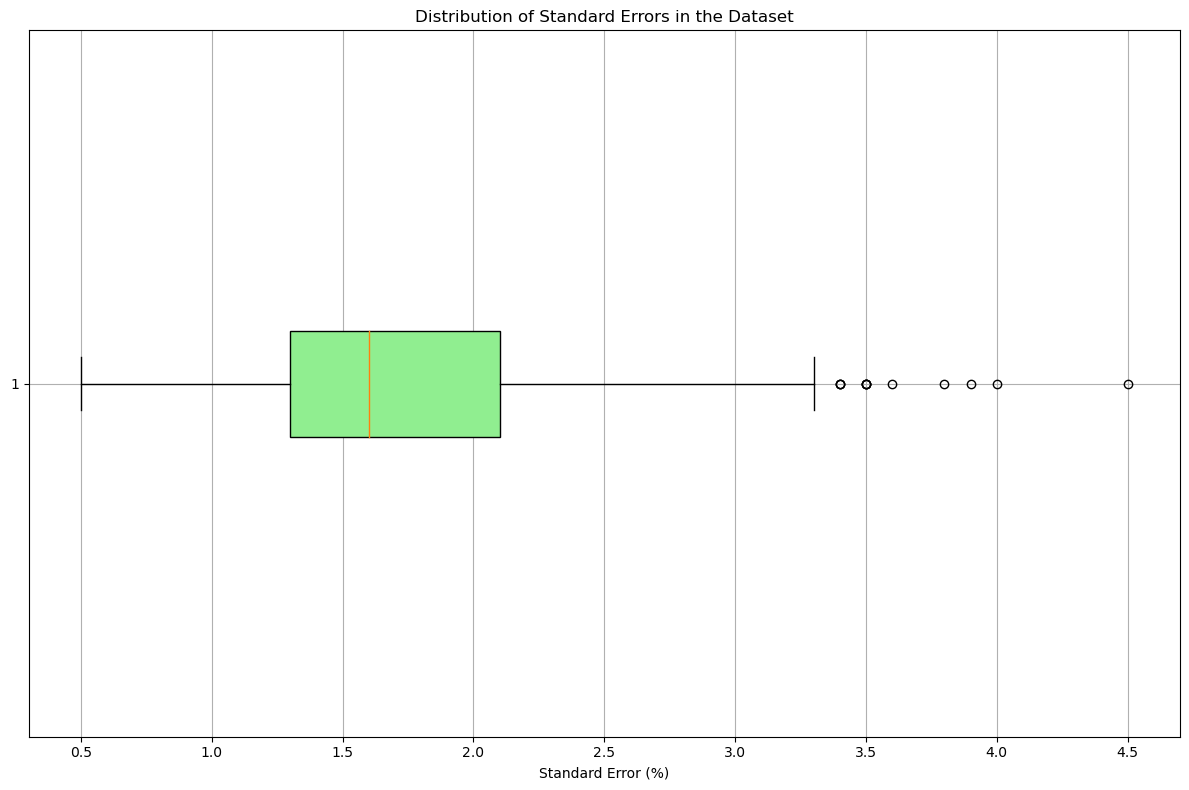

In [76]:
# Standard Error Boxplot using Matplotlib
plt.figure(figsize=(12, 8))
plt.boxplot(data_cleaned['SE'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Distribution of Standard Errors in the Dataset')
plt.xlabel('Standard Error (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
